In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:

file_path = "/content/Crop_recommendation.csv"
data = pd.read_csv(file_path)

data.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:

data.info()


data.describe()

data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


<ipython-input-6-156b62058116>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['label'], palette="viridis")


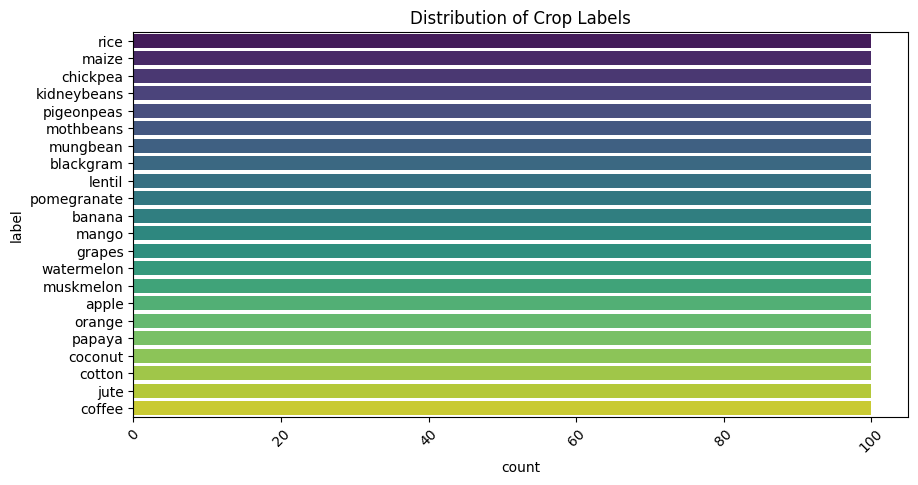

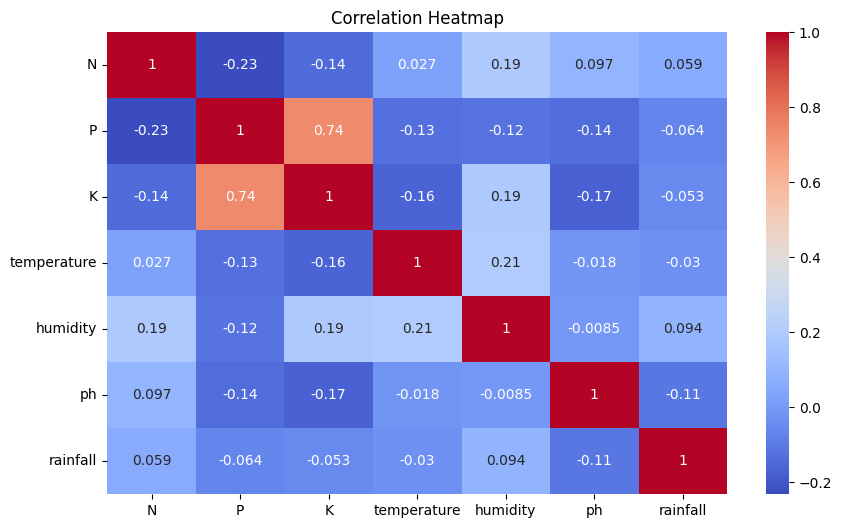

In [6]:

if 'label' in data.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data['label'], palette="viridis")
    plt.title("Distribution of Crop Labels")
    plt.xticks(rotation=45)
    plt.show()

plt.figure(figsize=(10, 6))
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

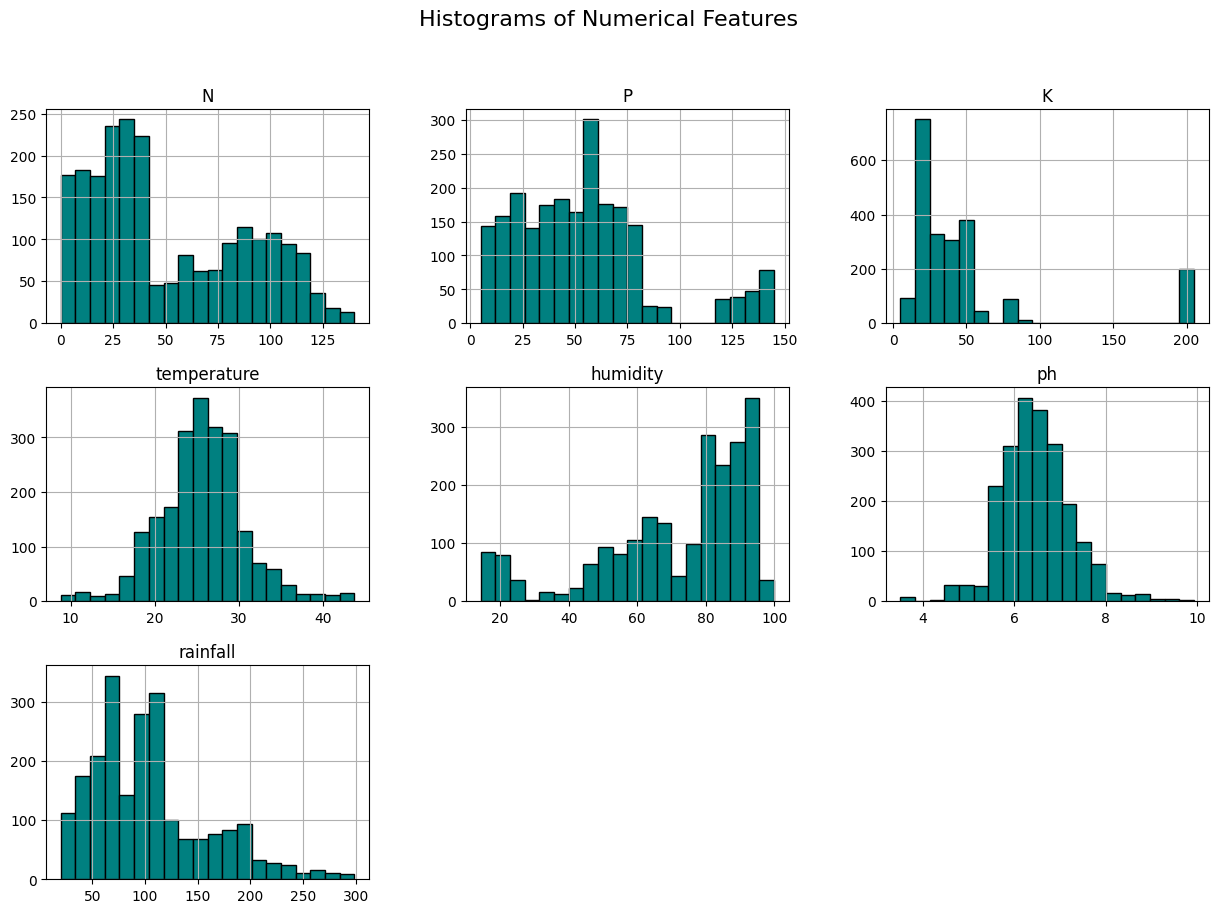

In [7]:
data.hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


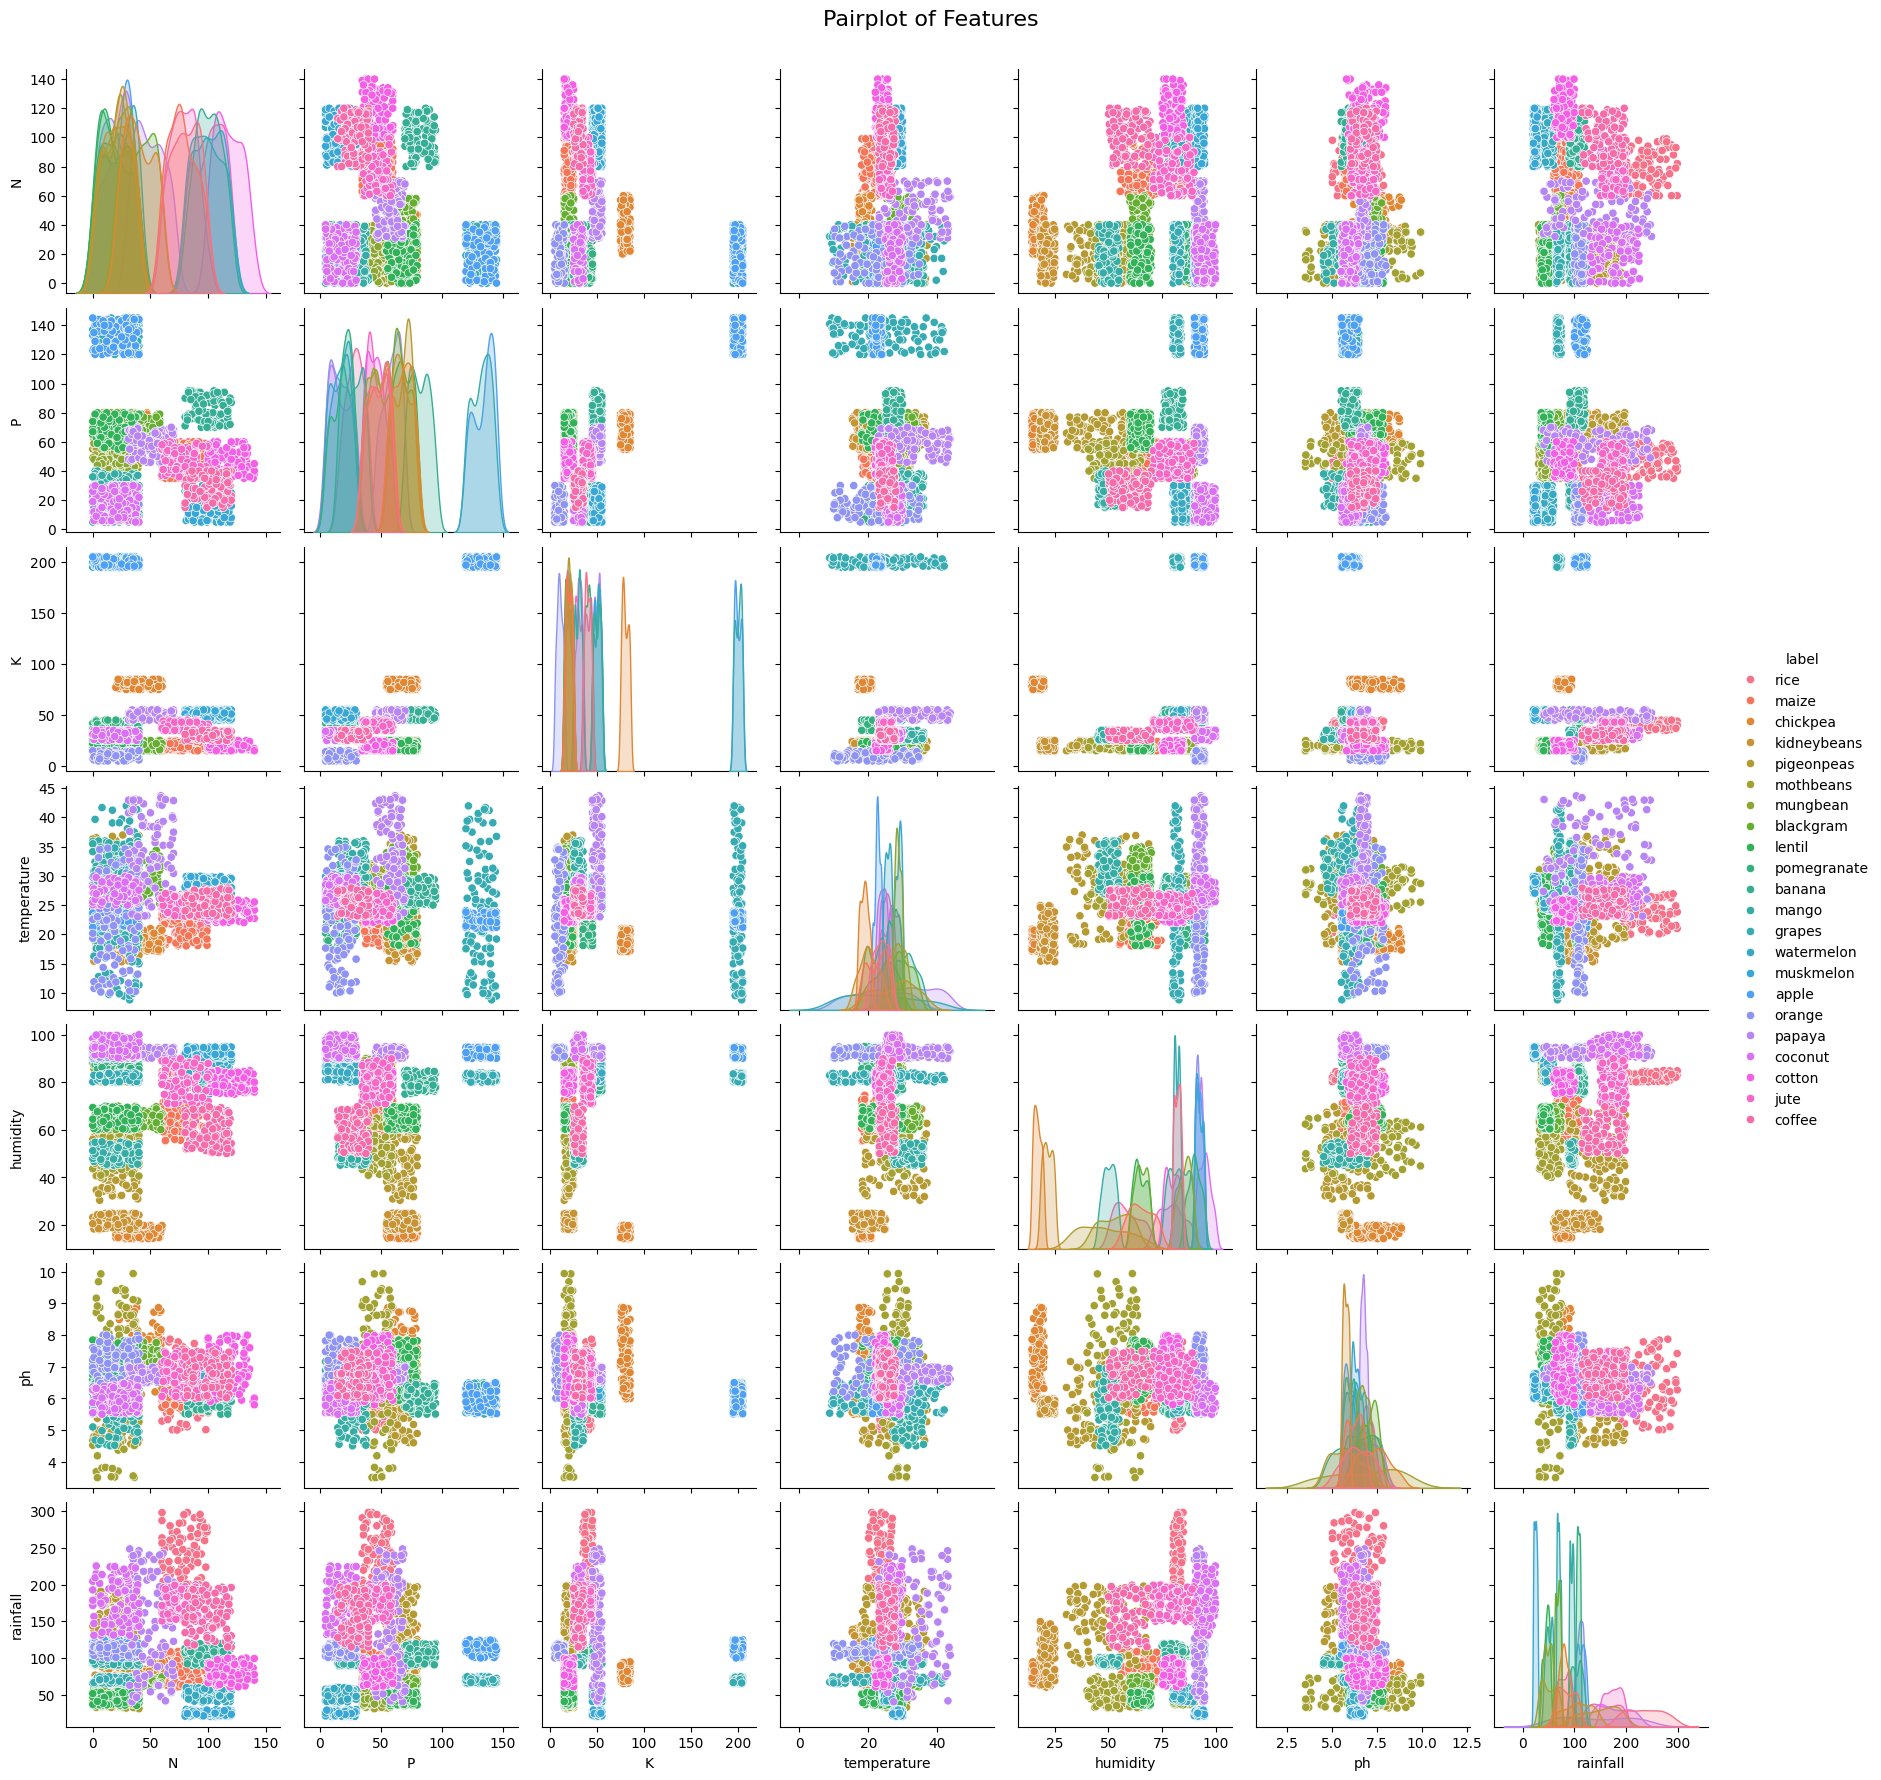

In [8]:
sns.pairplot(data, hue='label' if 'label' in data.columns else None, palette="husl")
plt.suptitle("Pairplot of Features", y=1.02, fontsize=16)
plt.show()


<ipython-input-9-1da251fc3702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=data, palette="Set2")


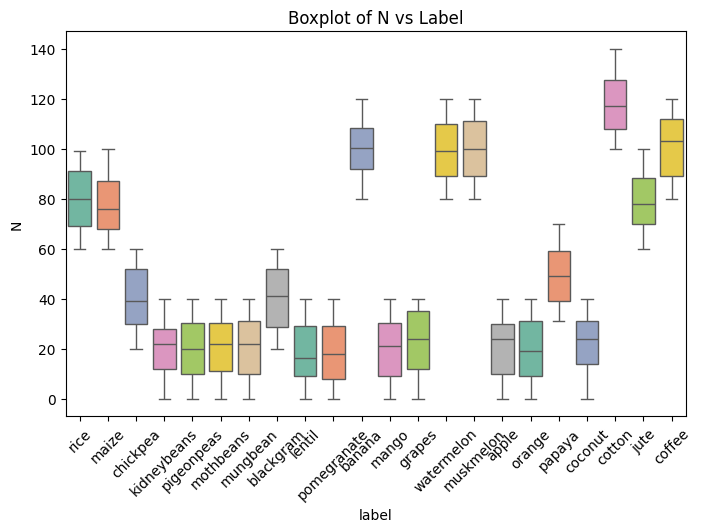

<ipython-input-9-1da251fc3702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=data, palette="Set2")


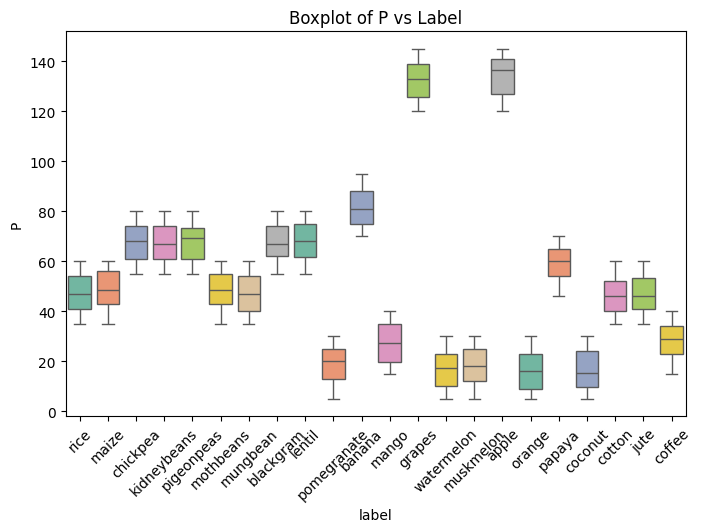

<ipython-input-9-1da251fc3702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=data, palette="Set2")


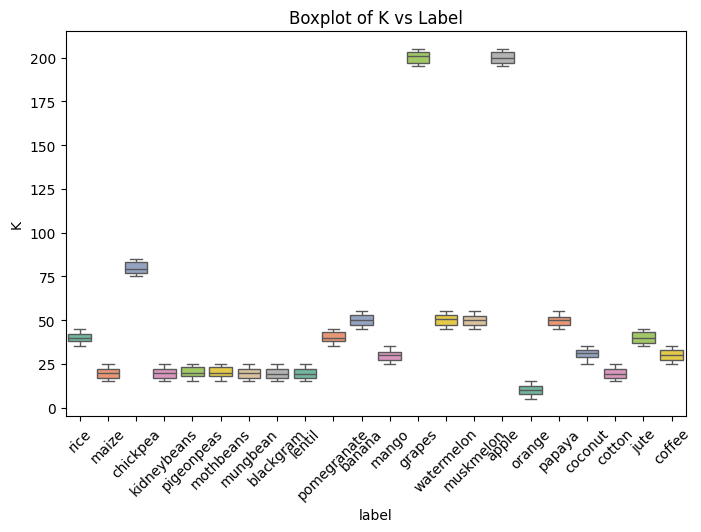

<ipython-input-9-1da251fc3702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=data, palette="Set2")


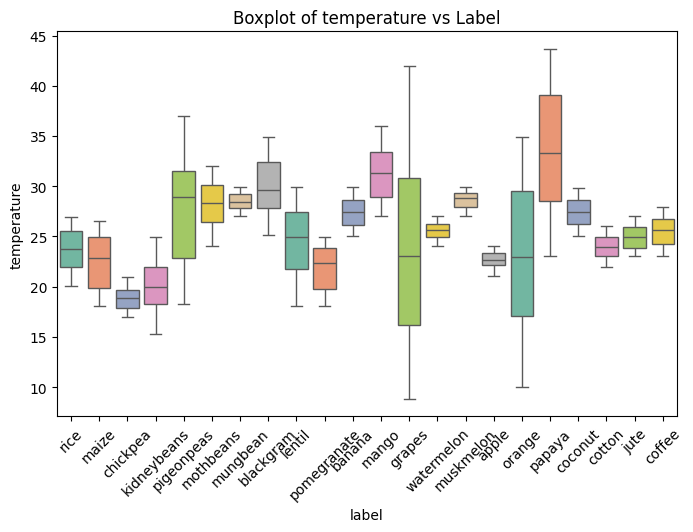

<ipython-input-9-1da251fc3702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=data, palette="Set2")


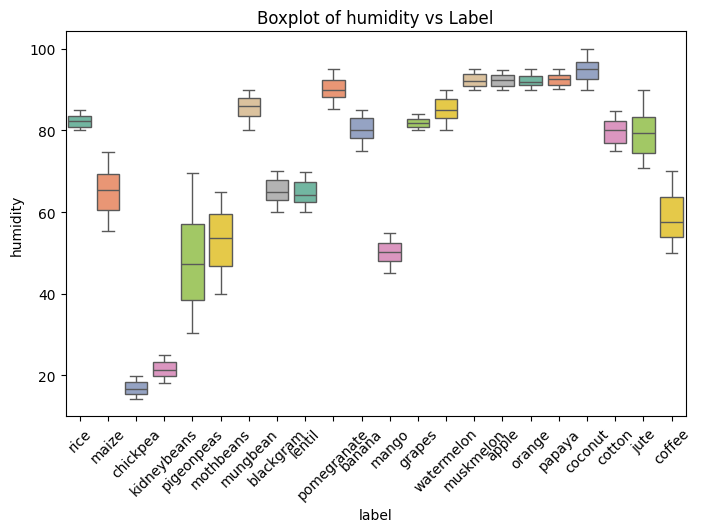

<ipython-input-9-1da251fc3702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=data, palette="Set2")


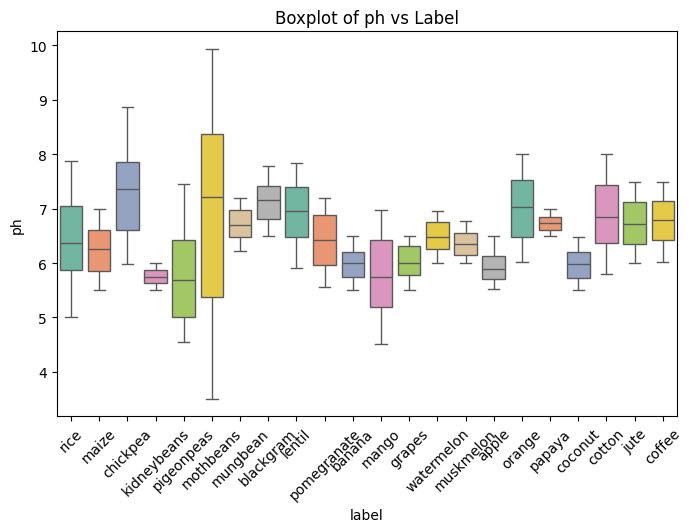

<ipython-input-9-1da251fc3702>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=column, data=data, palette="Set2")


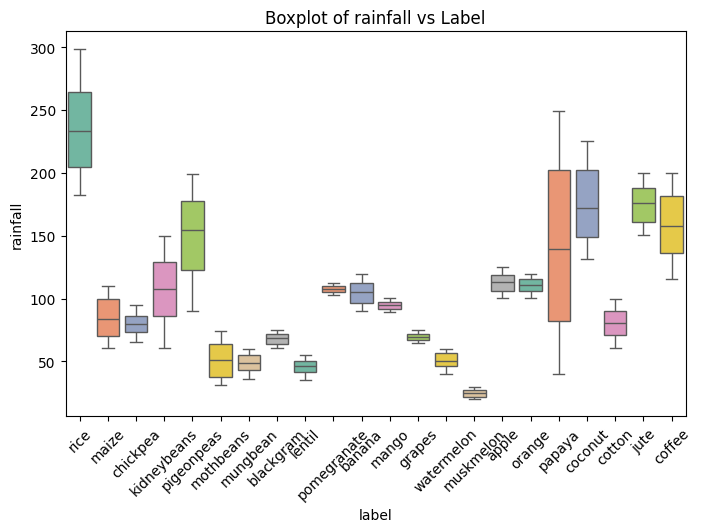

In [9]:
if 'label' in data.columns:
    for column in data.columns[:-1]:
        plt.figure(figsize=(8, 5))
        sns.boxplot(x='label', y=column, data=data, palette="Set2")
        plt.title(f"Boxplot of {column} vs Label")
        plt.xticks(rotation=45)
        plt.show()


In [11]:

print("Key Insights:")
if 'label' in data.columns:
    print(f"Number of unique crop labels: {data['label'].nunique()}")
    print("Labels and their counts:")
    print(data['label'].value_counts())


numerical_data = data.select_dtypes(include=np.number)
correlation_matrix = numerical_data.corr()
high_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False)
print("\nHighly Correlated Feature Pairs (excluding self-correlations):")
print(high_corr_pairs[(high_corr_pairs < 1) & (high_corr_pairs > 0.7)])

Key Insights:
Number of unique crop labels: 22
Labels and their counts:
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

Highly Correlated Feature Pairs (excluding self-correlations):
P  K    0.736232
K  P    0.736232
dtype: float64


In [12]:

cleaned_file_path = "/content/Crop_recommendation._cleaned.csv"
data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved at: {cleaned_file_path}")


Cleaned dataset saved at: /content/Crop_recommendation._cleaned.csv
